# Week 3 Exercise

In [54]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

# Simple Fixed Point Iteration

Suppose that we want to solve  $$\sin x + \cos x + 2x = 0$$

1) What is a fixed point?

where $  f(x) = x$

2) Write the equation we are trying to solve in terms of fixed point equation.

3) Find the solution to the above equation using fixed point iteration. Start somewhere reasonable.

In [42]:
def f(x):
    return (math.sin(x)+math.cos(x))/-2 
def findSol(x):
    c_val = f(x)
#     print c_val
    if(np.abs(x-c_val) <= 1e-8):
        return x
    else:
        return findSol(c_val)

ans = findSol(-4)
print ans

-0.318366329462


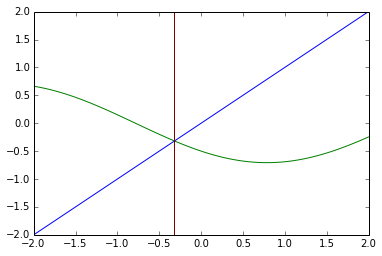

In [53]:
xs = np.linspace(-2,2,100)
plt.plot(xs,xs)
plt.plot(xs,[f(x) for x in xs])
plt.axvline(ans,c='maroon')

4) Does it guarantee convergence? (Try solve $x^3 - x = 0$ starting at $x = 1.2$) What do you think happens?

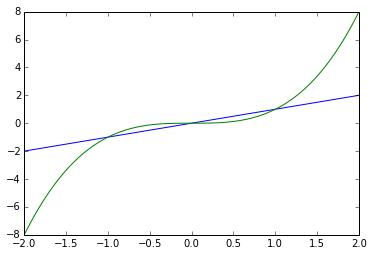

In [54]:
def newf(x):
    return x**3

plt.plot(xs,xs)
plt.plot(xs,[newf(x) for x in xs])
    

It can go infinitely

# Convergence

1) What is convergence and how do we measure it?

subtract the current val with the solution

For the rest of this section let's pretend that we are trying to solve 

$$x = e^{-x}$$


2) Verify graphically that the solution is at 0.56714329

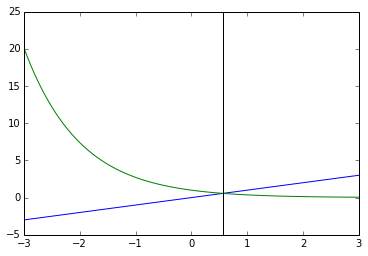

In [67]:
xs = np.linspace(-3,3,109)
plt.plot(xs,xs)
plt.plot(xs,[math.exp(-x) for x in xs])
cheatAns = 0.56714329
plt.axvline(cheatAns,c='k')

3) For binomial method find $E_i$ (This is the real error not the bound on error. Yes we cheated). Plot it against i. Try starting with the bound of 0.5 and 0.6. Do it 20 times. Limit y to 1

In [115]:
xxs = []
yys = []
def bisection(f, l, r, n):
    for i in range(n):
        c = (l+r)/2.0
        xxs.append(i)
        yys.append(np.abs(c-cheatAns))
        if f(l)*f(c) < 0:
            r = c
        else:
            l = c    
    return c
def expf(x):
    return math.exp(-x)-x
bisection(expf,0.5,0.6,20)


0.5671433448791504

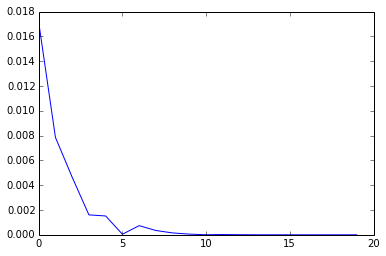

In [120]:
plt.plot(xxs,yys)


4) Find $E_i$ for the fixed point iteration method. Do it 20 times. Start at 0.5. Plot it.

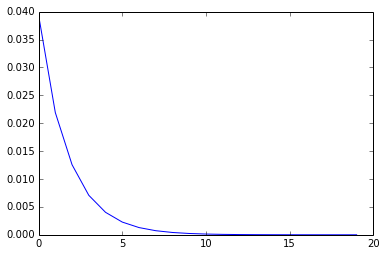

In [127]:
yi=[]
xi=[]
def findAns(x):
    for i in range(20):
        c_val = math.exp(-x)
        xi.append(i)
        yi.append(np.abs(c_val-cheatAns))
        x = c_val
    return x
findAns(0.5)
plt.plot(xi,yi)

5) Find $E_i$ for Newtons method. Do it 20 times start at 0.5. Plot it.

0.56714329041


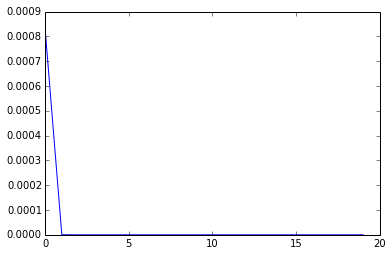

In [134]:
xi = []
yi = []
def df(x):
    return -math.exp(-x)-1
def next_x(x):
    return x-(expf(x)/df(x))
def newtonSol(x):
    for i in range(20):
        c_val = next_x(x)
        xi.append(i)
        yi.append(np.abs(c_val-cheatAns))
        x = c_val
    return x
print newtonSol(0.5)
plt.plot(xi,yi)


6) Plot $E_{i+1}/E_{i}$ vs $i=0..19$ for the three methods. How should we intepret the graph? (limit y to 1)

3.0


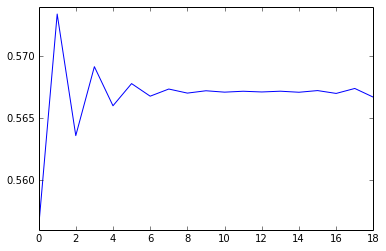

In [146]:
yi=[]
xi=[]
def findAns(x):
    for i in range(20):
        c_val = math.exp(-x)
        xi.append(i)
        yi.append(np.abs(c_val-cheatAns))
        x = c_val
    return x
findAns(0.5)
print x
plt.plot(np.array(yi[1:])/np.array(yi[:-1]))


7) Let's mathematically prove it. (Just something you should see it once in your life and forget)

8) What is quadratic convergence? Why is it better than linear convergence?

Yes

## Numerical Derivative

1) Let $f(x) = x^3$ analytically calculate $f'(0.5)$.

In [12]:
d = 3*0.5**2
print d


0.75


2) Use forward finite difference to approximate $f'(0.5)$ with $h=0.1$

In [13]:
def f(x):
    return x**3
def df(x,h):
    return (f(x+h)-f(x))/h
df(0.5,0.1)

0.9099999999999997

3) Use forward finite difference to approximate $f'(0.5)$ with $h=0.001$

In [10]:
df(0.5,0.001)

0.7515009999999878

4) Use centered finite difference to approximate $f'(0.5)$ with $h=0.1$

In [17]:
def cf(x,h):
    return (f(x+h)-f(x-h))/(2.*h)
cf(0.5,0.1)

0.7599999999999998

5) Use centered finite difference to approximate $f'(0.5)$ with $h=0.001$

In [16]:
cf(0.5,0.001)

0.7500009999999931

6) Let $f(x) = \sin(x)$ analytically know that $f'(x)=\cos(x)$. Plot $\cos(x)$ along with the derivative obtained from finite difference. Pick a reasonable value for $h$ and plotting range.

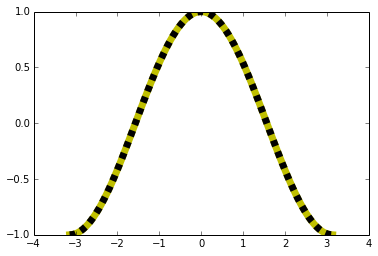

In [52]:
def f(x):
    return math.sin(x)

def adf(x):
    return math.cos(x)

def df(x,h):
    return (f(x+h)-f(x-h))/(2*h)

xs = np.linspace(-np.pi,np.pi,100)
ays = [adf(x) for x in xs]
ys = [df(x,1e-5) for x in xs]
plt.plot(xs,ays,'y',lw=7)
plt.plot(xs,ys,'k',ls='--',lw=7)

7) Find $f''(0.5)$ for $f(x) = x^5$ using centered finite difference for $h=0.05$

In [51]:
def f(x):
    return (x**5)

def adf(x):
    return (20*x**3)
def df(x,h):
    return (f(x+h)-f(x-h))/(2*h)


def ddf(x,h):
    return (df(x+h,h)-df(x-h,h))/(2*h)

print ddf(0.5,0.05),adf(0.5)


2.55 2.5


# Edge Detection (probably gonna be part of your homework)

1) Read in Mario.png
```
im = plt.imread(filename)
plt.imshow(im)
```

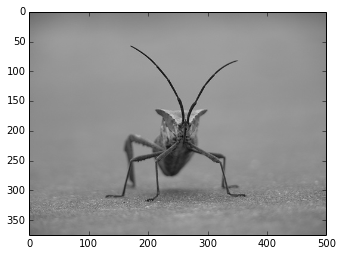

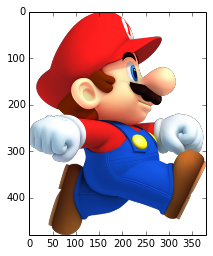

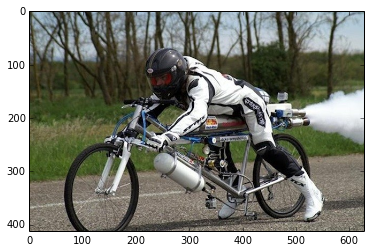

In [62]:
stinkbug = plt.imread('stinkbug.png')
mario = plt.imread('mario.png')
rocket = plt.imread('rocket-bicycle.png')
plt.imshow(stinkbug)
plt.figure()
plt.imshow(mario)
plt.figure()
plt.imshow(rocket)

2) The dimension of each output is the following: Can you guess what each dimension means?

or read this http://matplotlib.org/api/image_api.html

In [63]:
print stinkbug.shape
print mario.shape
print rocket.shape

(375, 500, 3)
(480, 381, 4)
(412, 628, 3)


3) Try to get a pixel on mario hat. It should be really close to red [1,0,0,1]. Note that the first dimesion is actually y not x.
```
    mario[y,x]
```

3.1) You can make a big blob in the image too
```
    mario [10:20,30:40] = np.array([0,1,0,1]) #green
```
this changes the image array where the first index is 10 to 20 and second index from 30 to 40 all to green. This is called chunk assignment. Quite convenient.

Try imshow after you edit. If you need to reset mario, do 
```
mario = plt.imread('mario.png')
```


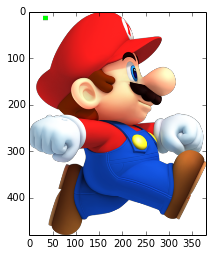

In [64]:
mario [10:20,30:40] = np.array([0,1,0,1])
# try to get dot in hat
# mario [50,170] = np.array([0,0,1,1])
plt.imshow(mario)

4) What defines an edge? What quantity distinguish the pixel in the middle of the hat and the pixel separating the hat and his ear?

vector around the edge is different

5) Write a function that given location $y,x$ and then calculate how "likely" it is that pixel x,y is an edge pixel.

In [82]:
def norm_s(v):
    return v[0]**2 + v[1]**2 + v[2]**2 + v[3]**2


def edgeness(pic,y,x):
    selfp = pic[y][x]
    topp = pic[y-1][x]
    leftp = pic[y][x-1]
    rightp = pic[y][x+1]
    botp = pic[y+1][x]
    
    v= norm_s(topp-selfp)
    v+= norm_s(botp-selfp)
    v+= norm_s(rightp-selfp)
    v+= norm_s(leftp-selfp)
    
    return [0,0,0,1] if v/4.>0.2 else v/4.


print edgeness(mario,28,100)

0.168085347528


6) Make an empty 3d array of (ydimension, xdimension, ncolor). Then start putting in each pixel with the size of gradient.

In [83]:
edge = np.zeros(mario.shape)
edge.shape
ny,nx,d=edge.shape
for iy in xrange(1,ny-1):
    for ix in xrange(1,nx-1):
        edge[iy,ix] = edgeness(mario,iy,ix)

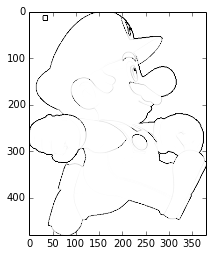

In [84]:
plt.imshow(edge)

In [ ]:
# rs = mario[1:-1,1:-1] - mario[0:-2,1:-1]

7)Show the result.

8) Wrap all these in a function and try it on other images